# <span style="color:#0000aa">Tropycal front end to IMERG rainfall data fetch</span>

<span style="color:green">Brian Mapes, Feb 2022</span>

## What is Tropycal?

- Tropycal is an open source Python package intended to simplify the process of obtaining and analyzing tropical cyclone data


- Tropical cyclone data can be retrieved globally, and quickly analyzed and plotted in a few simple lines of code


- Tropycal aims to provide tools for the operational and research communities for past and current tropical cyclones

## Why use Tropycal?

- Python has become a dominant programming language in Atmospheric Science in recent years


- Dedicated Python packages exist for standard meteorological calculations (e.g., MetPy), radar (e.g., Py-ART), etc.


- There is currently no dedicated and centralized package for tropical cyclone data and analyses

## Starting Your Code

- If you have little to no experience with Python, this section can be of use to you!


- When we start a Python script, we import the necessary package(s) that the script will use


- Tropycal works with Python 3.6 and higher, and uses Cartopy for plotting maps

In [1]:
#First, we import Tropycal and its key components: "tracks", "tornado", and "recon"
from tropycal import tracks, tornado, recon

#We then import "numpy" for mathematical calculations, and "datetime" for date and time functionality
import numpy as np
from datetime import datetime as dt,timedelta

#For the purposes of this talk, we'll be ignoring warnings from functions
import warnings
warnings.filterwarnings('ignore')

## Tropycal Data Structure

- Tropical cyclone data in Tropycal is organized into three primary structures:
     - <span style="color:blue;font-weight:bold">TrackDataset &#8594;</span> data from all tropical cyclones in this basin
     - <span style="color:blue;font-weight:bold">Season &#8594;</span> data from all storms in a single season
     - <span style="color:blue;font-weight:bold">Storm &#8594;</span> data from single storm


- Tropycal further contains tools for analyzing **tornadoes** and **reconaissance mission** data

## Reading in HURDATv2 Data

- To start off, we read in the HURDATv2 dataset containing North Atlantic tropical cyclones from 1851-present


- This data will be stored in a variable called "basin", containing the data and additional functions for data analysis
    - *"basin" is an instance of the object TrackDataset*


- We include a flag "include_btk=True" to read in the latest tropical cyclones not included in HURDATv2 yet

In [2]:
basin = tracks.TrackDataset('north_atlantic',include_btk=True)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (3.57 seconds)
--> Starting to read in best track data
--> Completed reading in best track data (5.34 seconds)


# TrackDataset object

- Now that we've read in HURDATv2 data into the "basin" variable, we can begin our analyses!


- First, let's take a look at what is contained in basin:

In [3]:
print(basin)

<tropycal.tracks.Dataset>
Dataset Summary:
    Basin:             north_atlantic
    Source:            hurdat
    Number of storms:  1936
    Maximum wind:      165 knots (Allen 1980)
    Minimum pressure:  882 hPa (Wilma 2005)
    Year range:        1851 — 2021


# Storm object

- Let's start with Hurricane Florence from 2018:

In [8]:
flo = basin.get_storm(('Florence',2018))
print(flo)

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      130 knots
    Minimum Pressure:  937 hPa
    Start Date:        1800 UTC 31 August 2018
    End Date:          0600 UTC 17 September 2018

Variables:
    date        (datetime) [2018-08-30 06:00:00 .... 2018-09-18 12:00:00]
    extra_obs   (int64) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [LO .... EX]
    lat         (float64) [12.8 .... 42.2]
    lon         (float64) [-16.9 .... -73.3]
    vmax        (int64) [20 .... 25]
    mslp        (int64) [1008 .... 1006]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL062018
    operational_id:  AL062018
    name:            FLORENCE
    year:            2018
    season:          2018
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             39.7
    realtime:        False
    invest:          False


# Storm object

- For further data analysis, we can convert this storm to a `Pandas.DataFrame()` object:

In [9]:
flo.to_dataframe()

,date,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin
0,2018-08-30 06:00:00,0,,LO,12.8,-16.9,20,1008,north_atlantic
1,2018-08-30 12:00:00,0,,LO,12.8,-17.9,25,1007,north_atlantic
2,2018-08-30 18:00:00,0,,LO,12.8,-19.0,25,1007,north_atlantic
3,2018-08-31 00:00:00,0,,LO,13.1,-20.2,30,1006,north_atlantic
4,2018-08-31 06:00:00,0,,LO,13.4,-21.4,30,1006,north_atlantic
...,...,...,...,...,...,...,...,...,...
74,2018-09-17 12:00:00,0,,EX,37.8,-82.0,25,1008,north_atlantic
75,2018-09-17 18:00:00,0,,EX,38.8,-82.0,25,1008,north_atlantic
76,2018-09-18 00:00:00,0,,EX,39.5,-80.5,25,1008,north_atlantic
77,2018-09-18 06:00:00,0,,EX,41.3,-76.8,25,1007,north_atlantic


# Storm object

- Plotting Florence's track is a simple line of code:

<GeoAxesSubplot:title={'left':'Hurricane FLORENCE','right':'31 Aug 2018 – 17 Sep 2018\n130 kt • 937 hPa • 39.7 ACE'}>

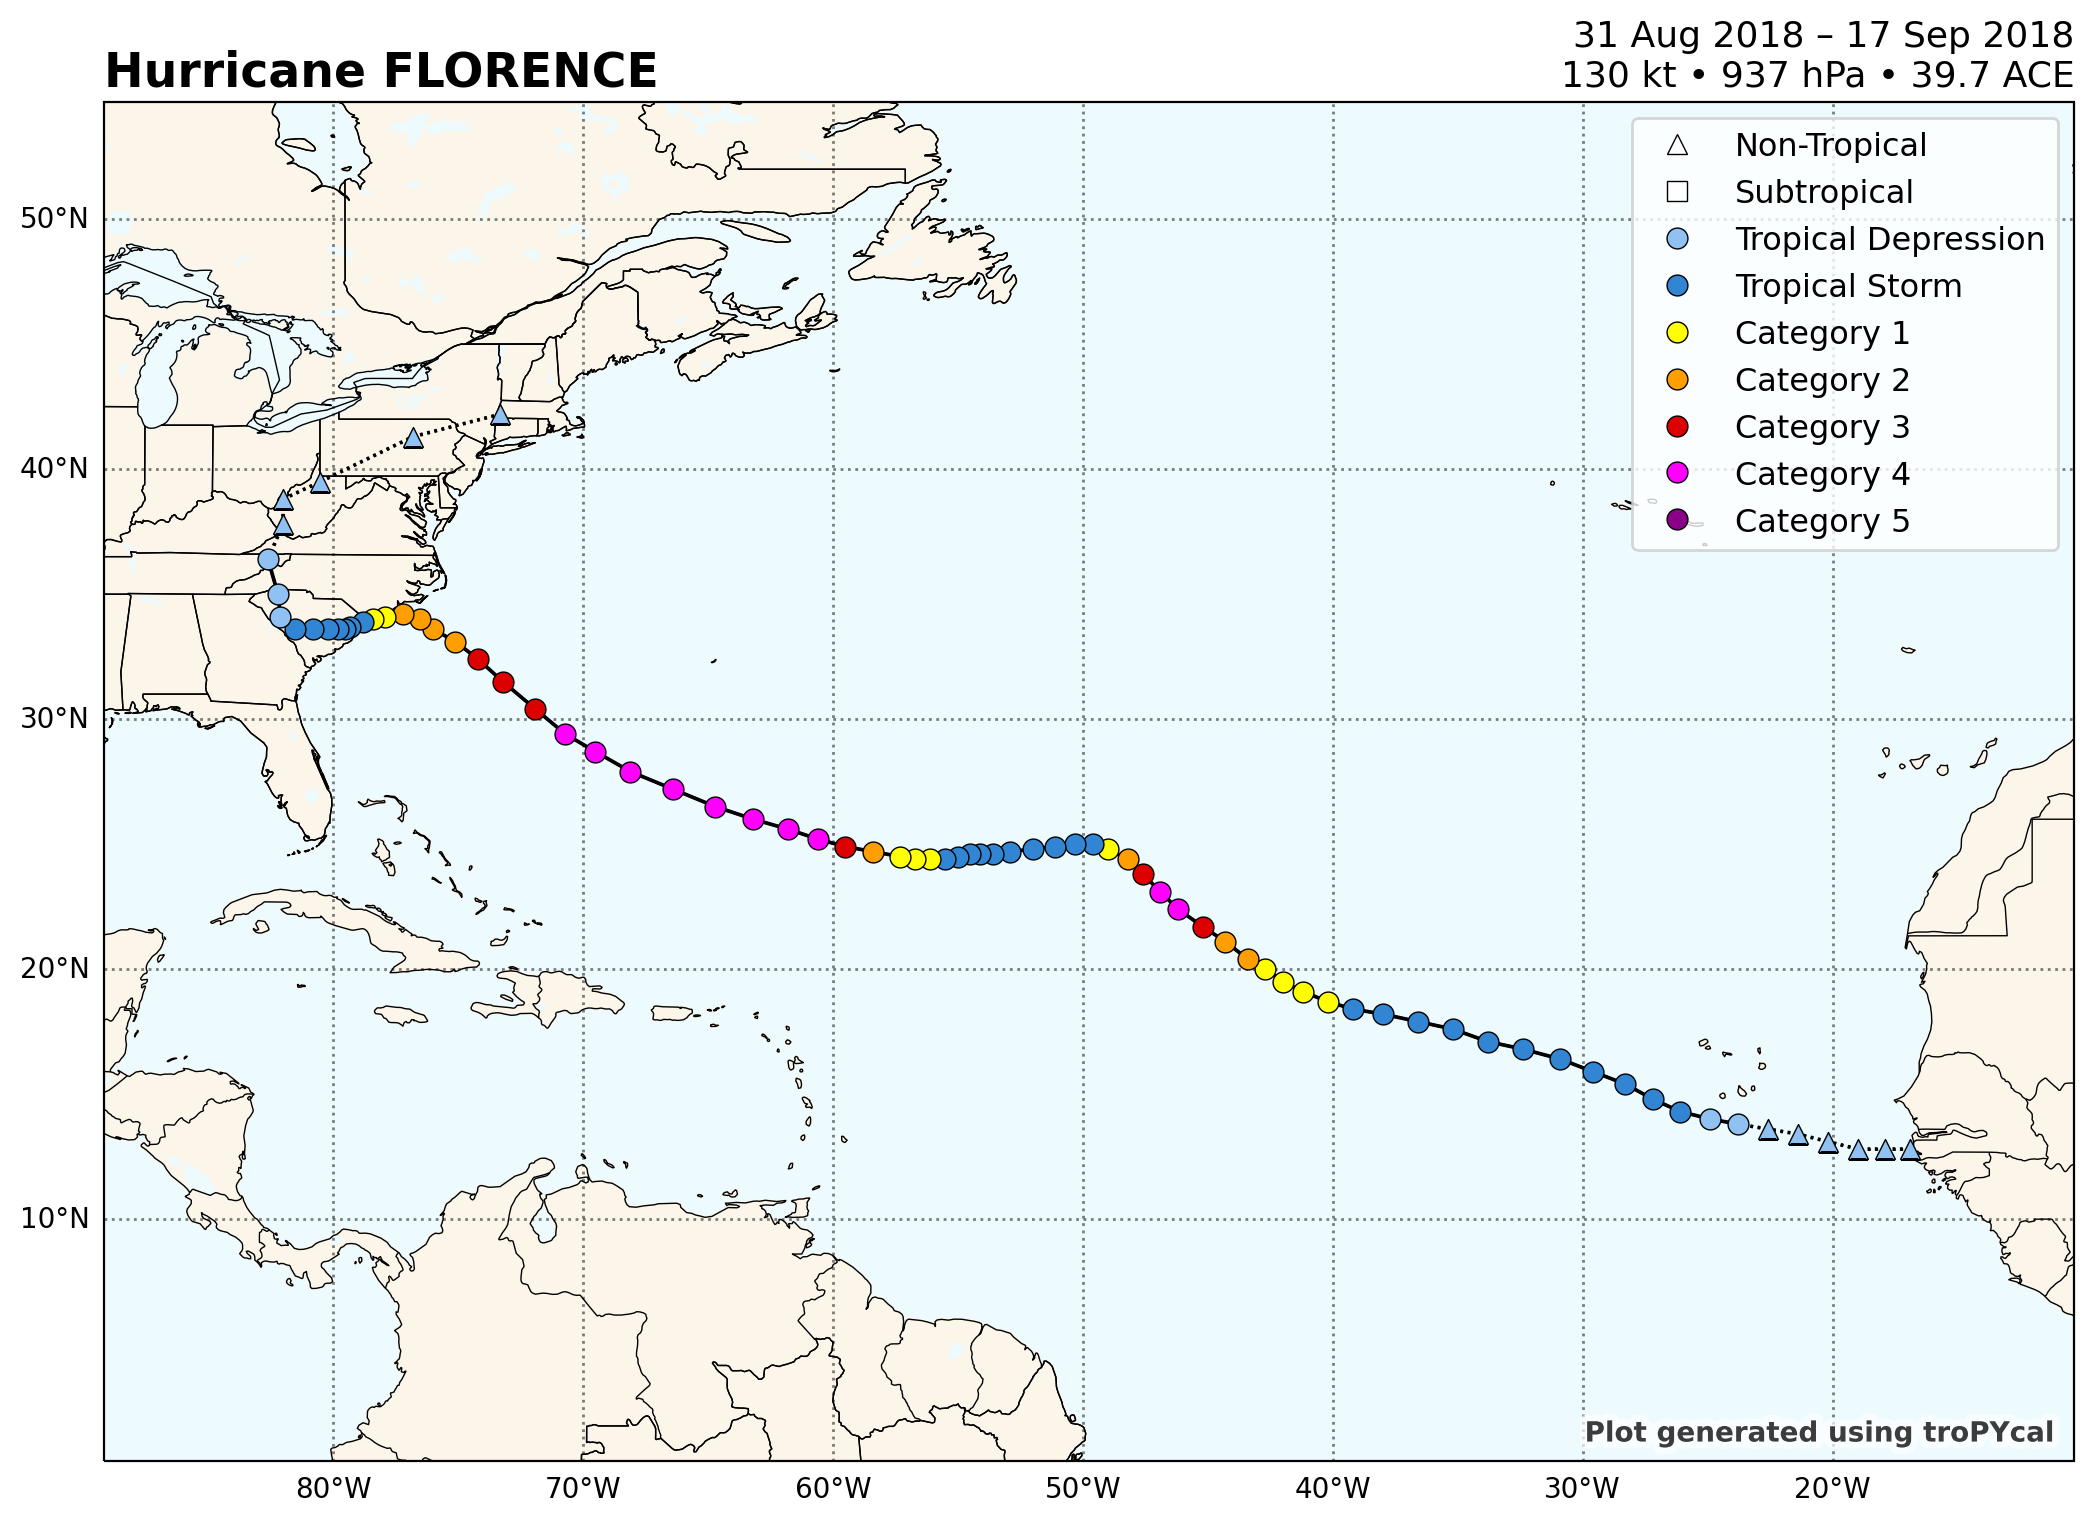

In [13]:
flo.plot()

In [16]:
# Grab rainfall at one time 
flo.lon[23]

-43.4

# Try to open IMERG data as a URL 
Landing page (monthly): https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGM_06/summary, half hourly https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGHHL_06/summary

GDS:https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGDF_06.info

THREDDS:https://gpm1.gesdisc.eosdis.nasa.gov/thredds/catalog/aggregation/GPM_3IMERGM.06/catalog.html?dataset=gpm_aggregation/GPM_3IMERGM.06/GPM_3IMERGM.06_Aggregation.ncml.ncml

OPENDAP: https://gpm1.gesdisc.eosdis.nasa.gov/opendap/GPM_L3/GPM_3IMERGM.06/contents.html

Try instructions at GES-DISC [cookbook site](https://disc.gsfc.nasa.gov/information/howto)

In [22]:
import xarray as xr 
#IMERG = xr.open_dataset('https://gpm1.gesdisc.eosdis.nasa.gov/thredds/dodsC/aggregation/GPM_3IMERGM.06/GPM_3IMERGM.06_Aggregation.ncml.ncml')
IMERG = xr.open_dataset('https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGDF_06')

# Access denied. Great, we are within an authentication step perhaps! 




syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.
syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: HTTP^ Basic: Access denied.


RuntimeError: NetCDF: Access failure

# Storm object


- Let's delve into the National Hurricane Center (NHC) archives!


- Say we want to plot the official NHC forecast from <span style="color:blue">1200 UTC 7 September 2018</span>:

<GeoAxesSubplot:title={'left':'Tropical Storm FLORENCE','right':'65 mph • 996 hPa • Forecast #33\nForecast Issued: 1500 UTC 07 Sep 2018'}>

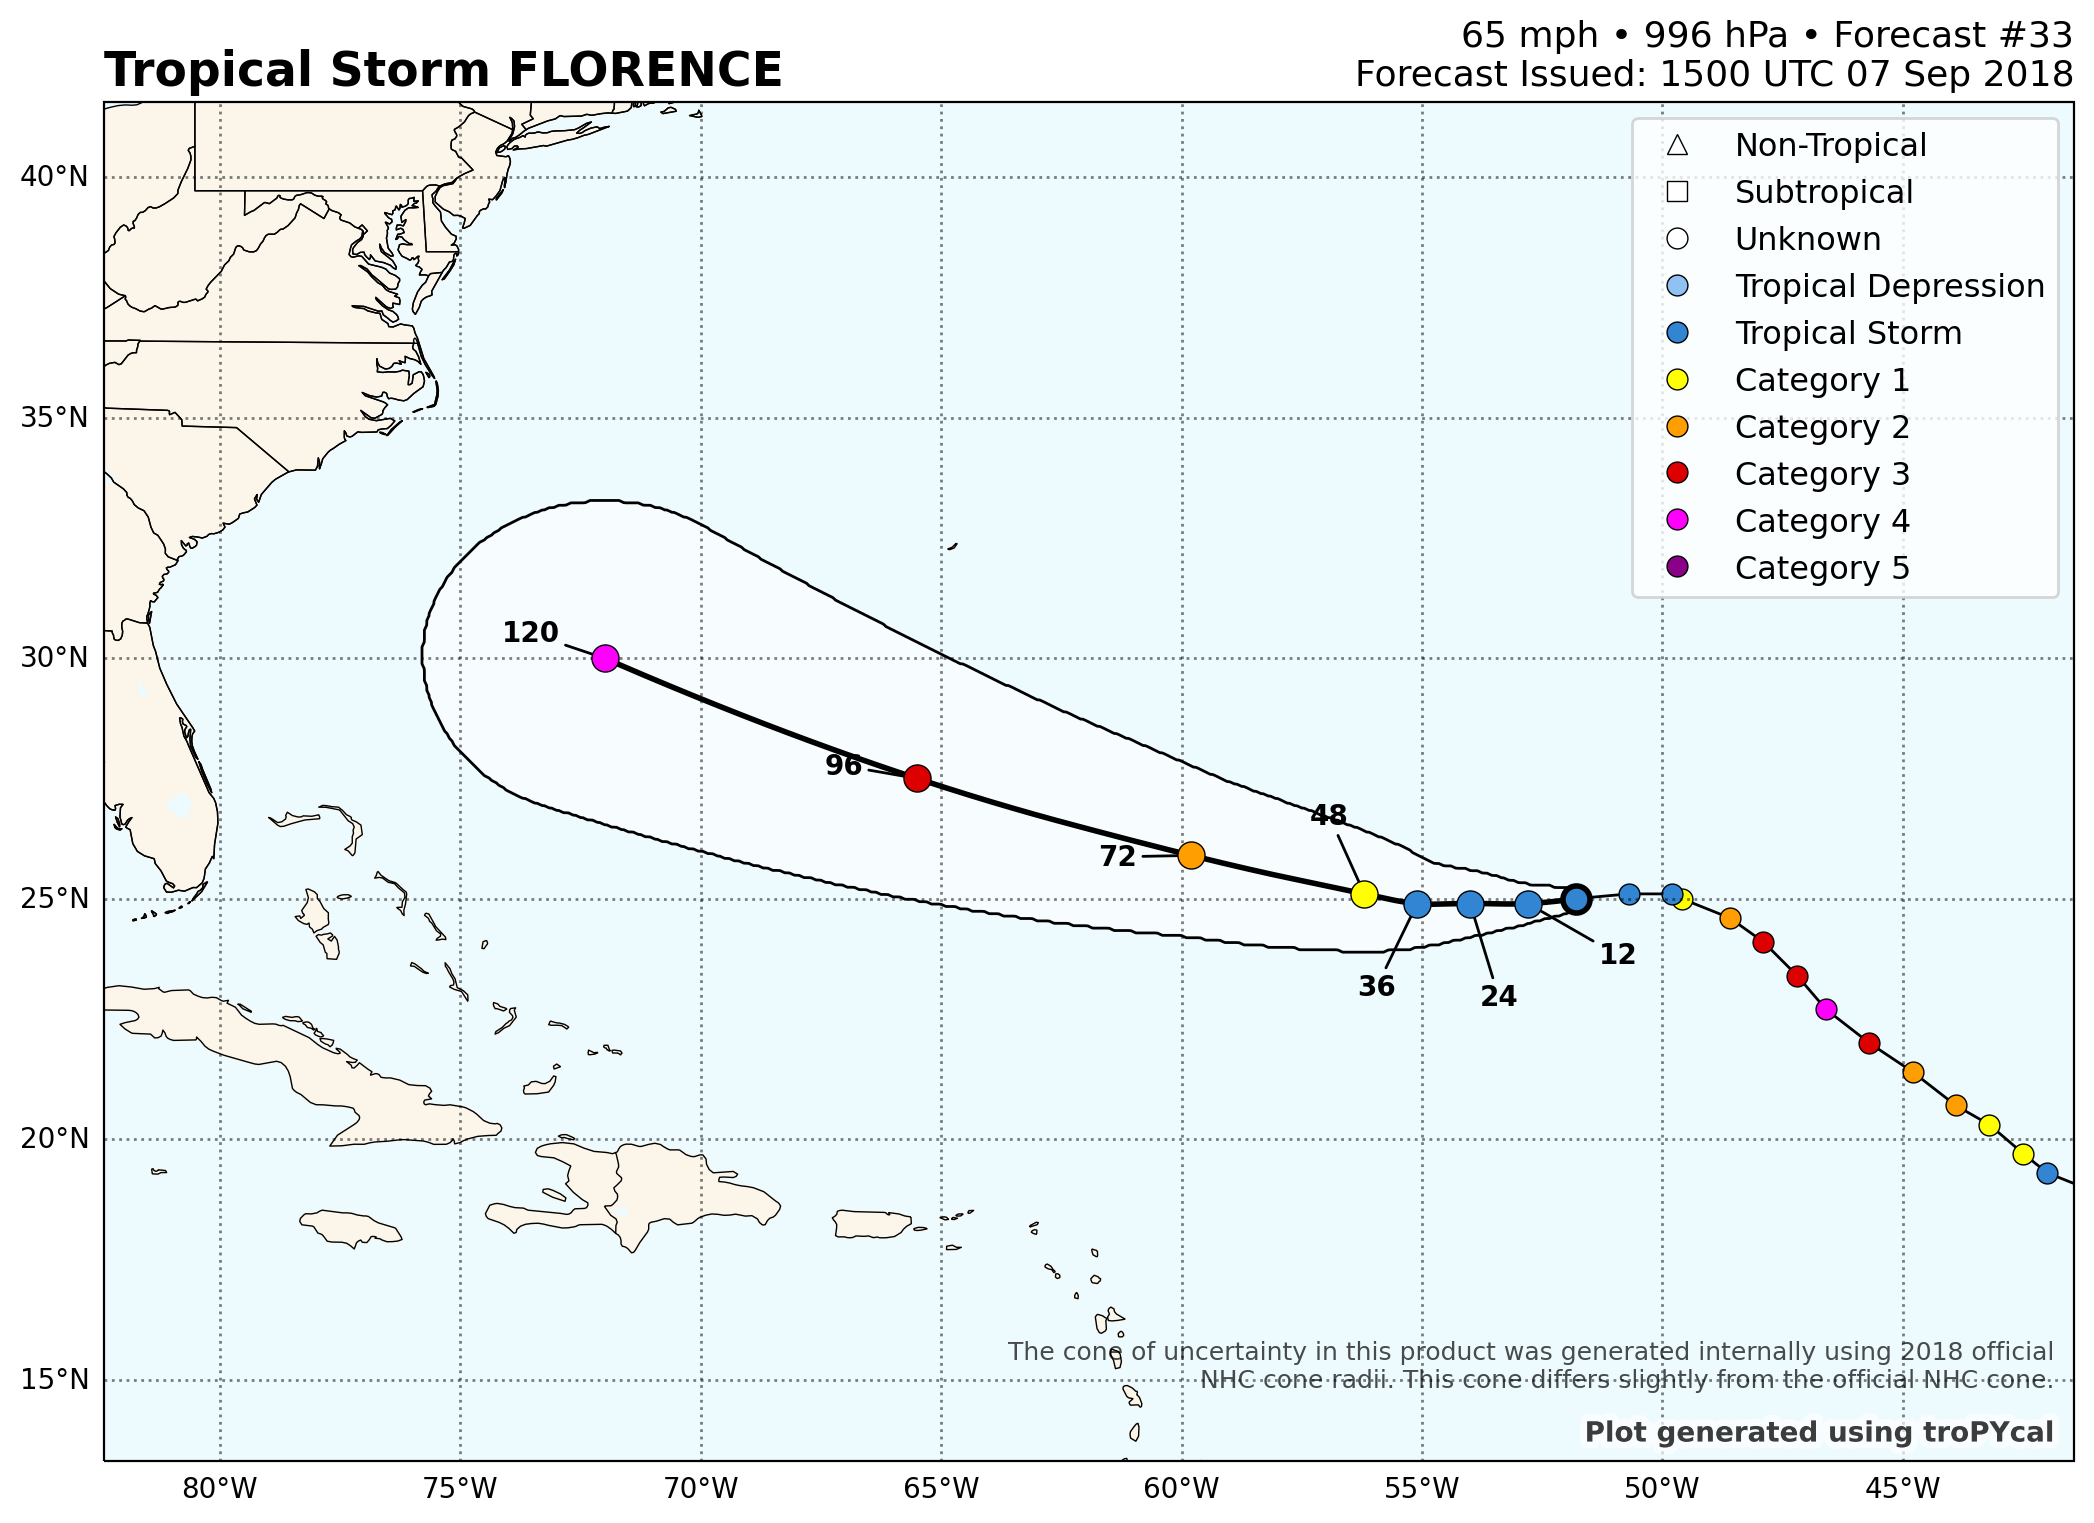

In [19]:
storm.plot_nhc_forecast(dt(2018,9,7,12))

# Storm object

- That's quite a remarkable forecast - quick intensification into a Category 4 hurricane!


- Let's glance at the forecast discussion that accompanied this:

In [20]:
discussion_info = storm.get_nhc_discussion(dt(2018,9,7,12))
print(discussion_info['text'])

ZCZC MIATCDAT1 ALL
TTAA00 KNHC DDHHMM

Tropical Storm Florence Discussion Number  33
NWS National Hurricane Center Miami FL       AL062018
1100 AM AST Fri Sep 07 2018

Moderate to strong southwesterly shear continues to affect Florence,
but visible and microwave satellite images indicate that the
cyclone is maintaining a vigorous, but tilted, circulation.
A mid-level eye feature is noted in both types of satellite
imagery, but the low-level center still appears displaced to the
southwest.  Subjective and objective satellite intensity estimates
have stopped falling--and some have even begun to increase a bit
again--so the initial intensity is being held at 55 kt.

The shear over Florence has likely reached its maximum and is
expected to decrease below 20 kt in 6-12 hours and then decrease to
10 kt or less in 36 hours.  All the while, sea surface temperatures
will be gradually increasing to between 28-29C, and perhaps more
importantly, oceanic heat content values will double in 3-4 days.

# Storm object

- We can further display the GEFS ensemble tracks, along with an ensemble spread ellipse and density plot

<GeoAxesSubplot:title={'left':'GEFS Forecast Tracks for Florence\nTrack Density (200-km radius)','right':'Hour 84 | Valid 0000 UTC 11 September 2018\nInitialized 1200 UTC 07 September 2018'}>

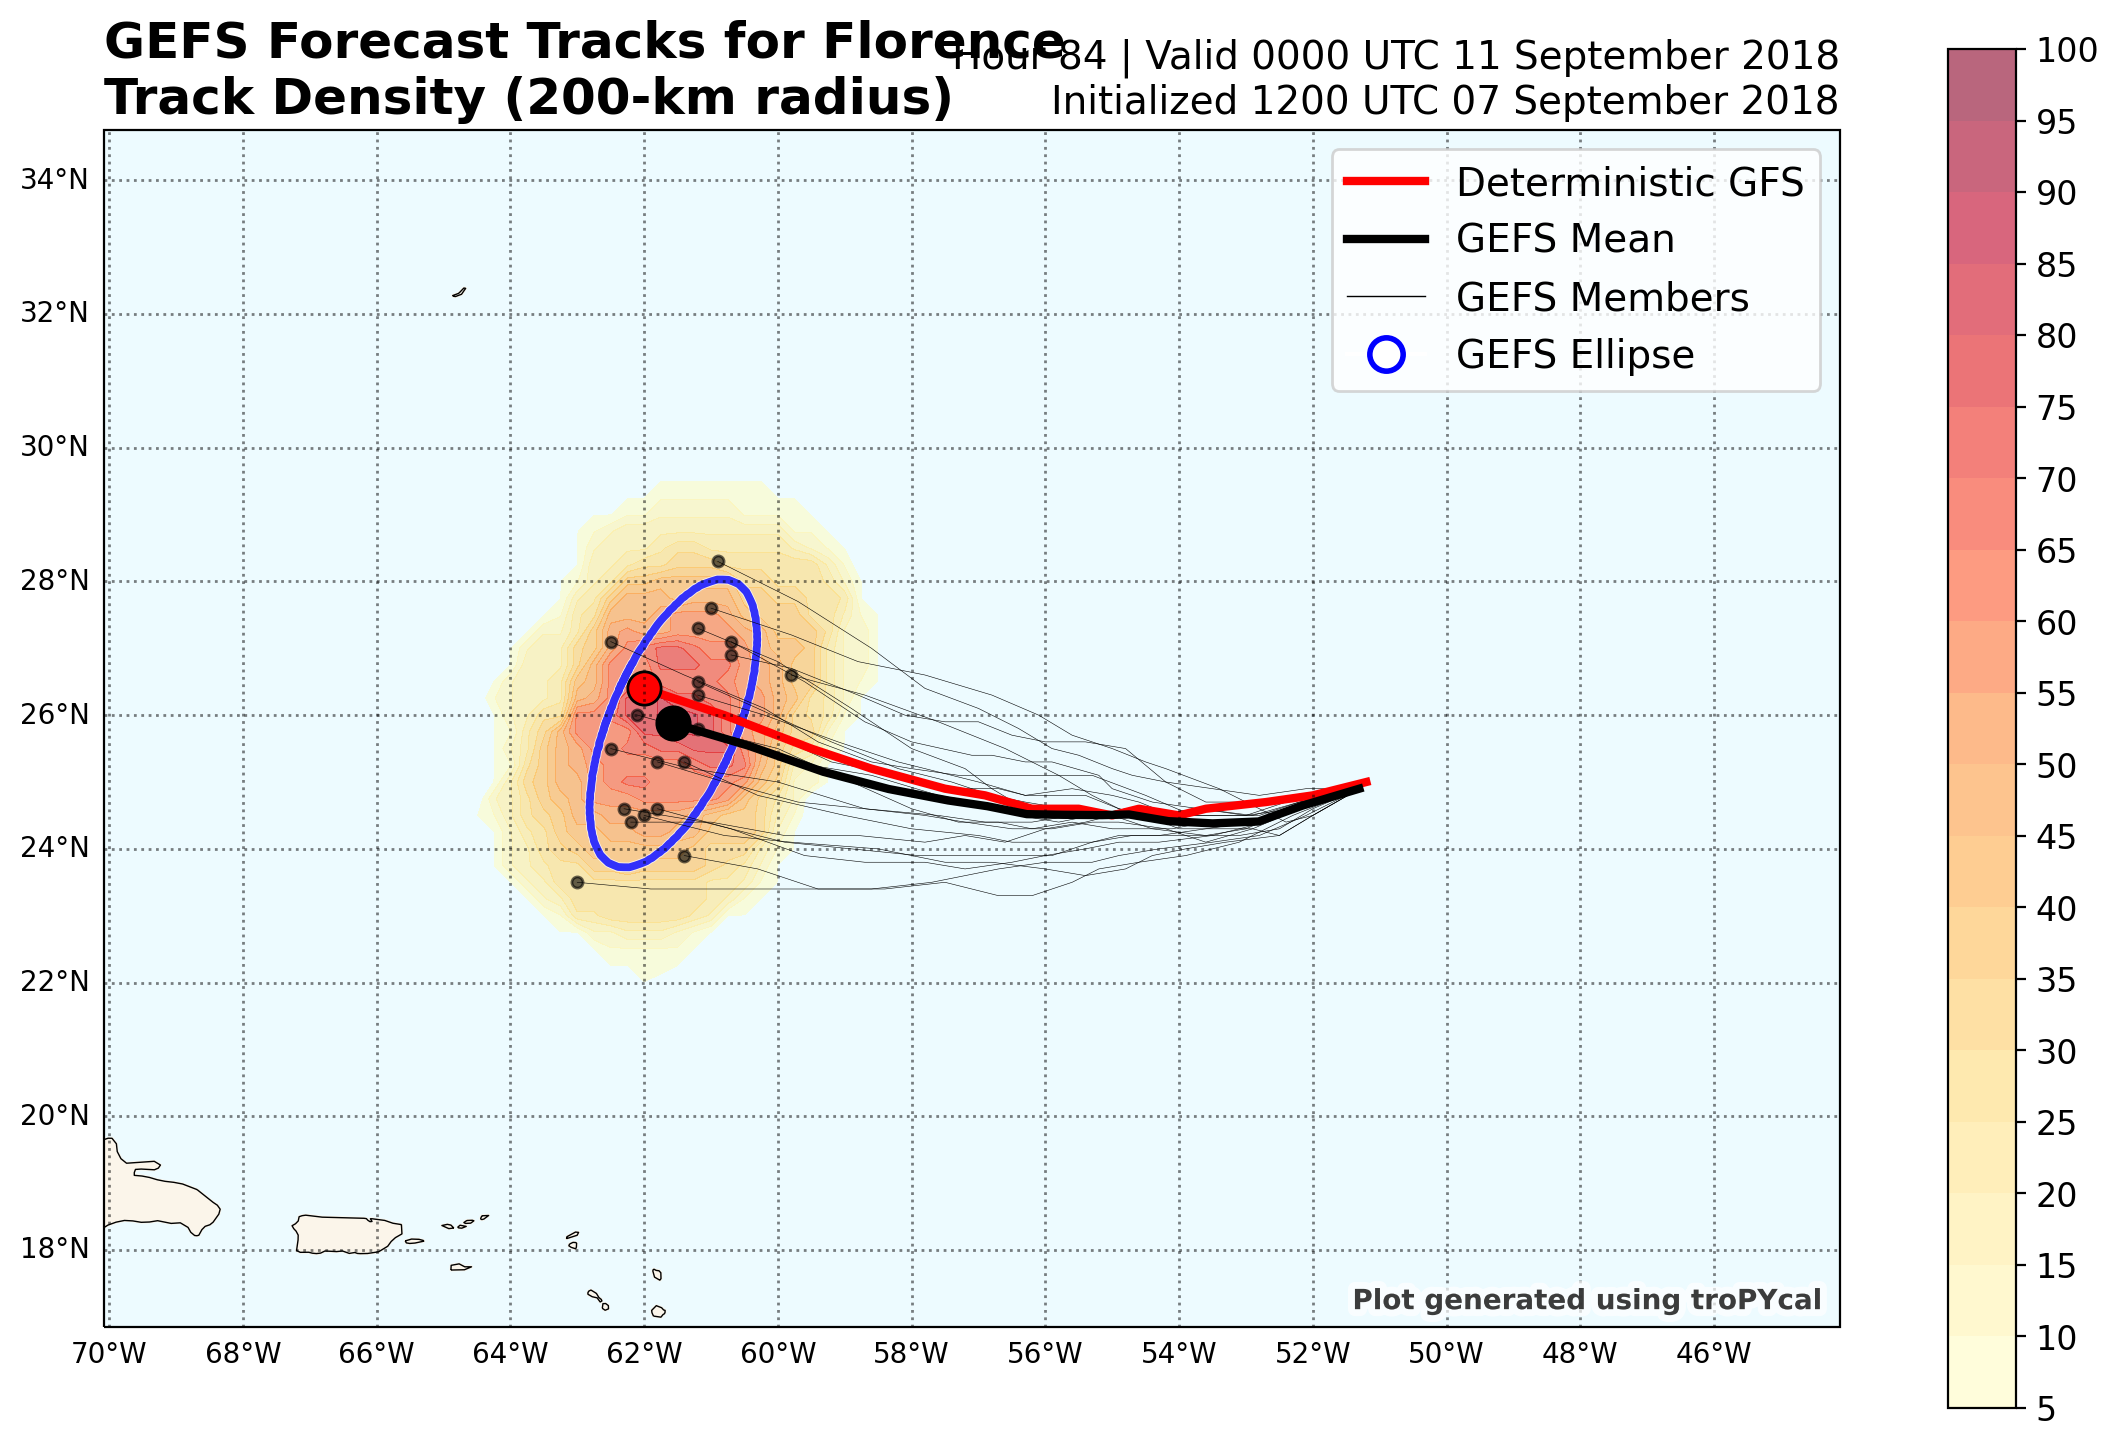

In [21]:
storm.plot_gefs_ensembles(forecast = dt(2018,9,7,12), fhr = [84])

# Storm object

- We can customize the storm plotting function in numerous ways


- One such way is to interpolate storm data to hourly, and plot the 24-hour sustained wind change:

ValueError: 'dvmax_dt' is not a valid value for color

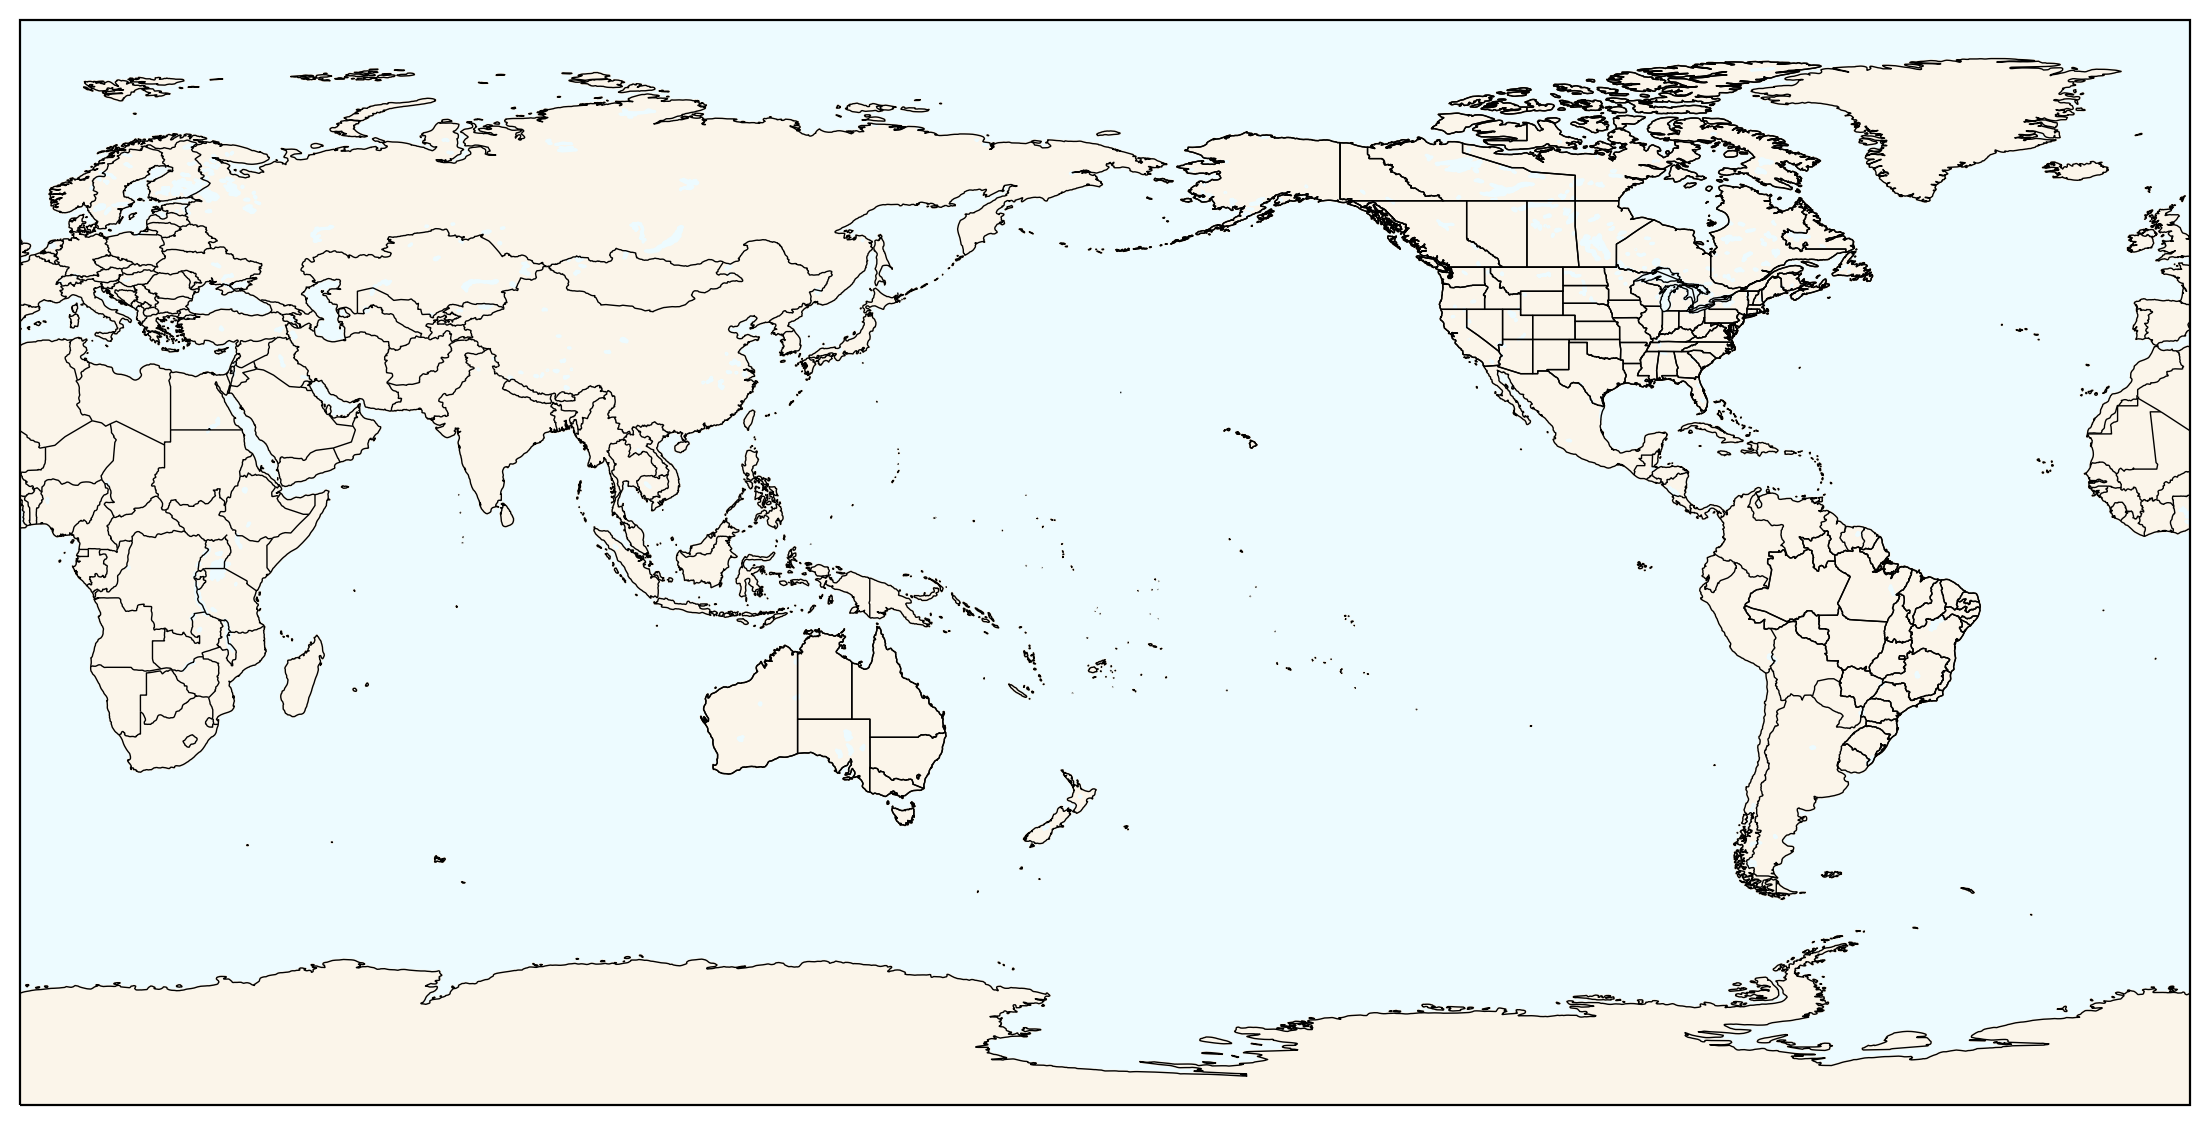

In [22]:
#Create a custom colormap
mycmap = {-60:'violet',-30:'royalblue',-29.99:'dodgerblue',0:'w',29.99:'tomato',30:'firebrick',60:'violet'}

#Interpolate storm to hourly data & plot without dots, colored by 24-hour sustained wind change in knots
storm.interp().plot(prop={'dots':False,'linecolor':'dvmax_dt','cmap':mycmap,'levels':(-61,61),'linewidth':3})

# Storm Aircraft Reconaissance

- A neat application of Storm objects is that we can attach operational reconaissance data to them


- Let's retrieve all of the operational reconaissance data from Hurricane Delta
    - *...this takes a while to run!*

In [23]:
storm = basin.get_storm(('Delta',2020))
storm.get_recon(read_path="delta_recon") #Here we are reading from a saved file to save time

FileNotFoundError: [Errno 2] No such file or directory: 'delta_recon'

In [24]:
mycmap = {0:'w',20:'dodgerblue',60:'gold',100:'firebrick',160:'violet'}
storm.recon.plot_points(varname='pkwnd',prop={'cmap':mycmap,'levels':(0,160)})

AttributeError: 'Storm' object has no attribute 'recon'

# Storm Aircraft Reconaissance

- Tropycal converts recon observations to storm-centered coordinates


- One type of plot we can make is an azimuthally averaged hovmoller of flight level wind:

In [25]:
mycmap = {0:'w',20:'dodgerblue',60:'gold',100:'firebrick',160:'violet'}
storm.recon.plot_hovmoller(prop={'cmap':mycmap,'levels':np.arange(0,161,10)})

AttributeError: 'Storm' object has no attribute 'recon'

In [26]:
mycmap = {0:'w',20:'dodgerblue',60:'gold',100:'firebrick',160:'violet'}
storm.recon.plot_maps(dt(2020,10,6,18),varname=('pkwnd','p_sfc'),
                      prop={'cmap':mycmap,'levels':np.arange(0,161,10)},radlim=150,window=4,align='end')

AttributeError: 'Storm' object has no attribute 'recon'

In [27]:
storm.recon.plot_maps(dt(2020,10,9,6),varname=('pkwnd','p_sfc'),
                      prop={'cmap':mycmap,'levels':np.arange(0,161,10)},radlim=150,window=4,align='end')

AttributeError: 'Storm' object has no attribute 'recon'

# Tornado Data

- Tropycal also has a Tornado utility


- Tornado tracks can be applied to a TrackDataset or Storm object, or as their own object


- To apply tornado tracks to a TrackDataset object, we can assign all tornadoes within a specified distance (km) to a TC


- Once we've done that, we can plot TC motion relative tornado paths

In [29]:
basin.assign_storm_tornadoes(dist_thresh=750)
basin.plot_TCtors_rotated('all')
## I notice the latest available file is 1950-2019, but the except: doesn't seem to work, it fails on try:

--> Starting to read in tornado track data


HTTPError: HTTP Error 404: Not Found

# Tornado Data

- We can also apply tornado data to individual storms


- Hurricane Ivan (2004) notoriously produced many tornadoes across the United States
    - *Let's plot Ivan's associated tornadoes and **Practically Perfect Hindcast (PPH)**:*

In [30]:
storm = basin.get_storm(('Ivan',2004))
storm.plot_tors(plotPPH=True)

--> Starting to read in tornado track data


HTTPError: HTTP Error 404: Not Found

# Tornado Data

- We can also apply the tornado dataset to non-TC applications


- To do so, we create an instance of a TornadoDataset object:

In [ ]:
Tors = tornado.TornadoDataset()

In [ ]:
Tors.plot_tors(dt(2012,4,14), plotPPH=True, domain='dynamic')

In [ ]:
Tors.plot_tors([dt(2011,4,1),dt(2011,4,30)], plotPPH=True, prop={'PPHlevels':(.5,1,1.5,2,3,4,6,9)})

# Conclusions

- Tropycal provides various methods for tropical cyclone analysis and visualization, in the Atlantic and globally


- We aim for this to be useful for both python and non-python users, for both research and operational purposes


- Tropycal is still in development, and user feedback is valuable for adding or enhancing features


- This script and additional examples are available on our GitHub page: https://github.com/tropycal




**Questions? Contact us at:**

- Tomer Burg - tomerburg@gmail.com

- Sam Lillo - splillo@gmail.com